```
min  c^t y
x in circ
z in simplex
z = x + y
```

In [1]:
import cvxpy as cvx
import numpy as np

In [2]:
N = 5

c = np.random.randn(N)

x = cvx.Variable(N)
y = cvx.Variable(N)
z = cvx.Variable(N)

obj = cvx.Minimize(c@y)
cst = [
    z == x + y,
    z >= 0,
    cvx.sum(z) <= 1,
    cvx.norm(x) <= 1,
]

prob = cvx.Problem(obj, cst)
prob.solve()

-6.988819011846923

In [3]:
c.round(2)

array([-2.3 ,  0.53, -3.08, -0.47, -0.01])

In [4]:
x.value.round(2)

array([-0.59,  0.14, -0.79, -0.12, -0.  ])

In [5]:
y.value.round(2)

array([ 0.59, -0.14,  1.79,  0.12,  0.  ])

In [6]:
z.value.round(2)

array([0., 0., 1., 0., 0.])

```
min  c^t y
z = x + y

other prob:
x in circ
z in simplex
```

In [7]:
import proxie
from proxie import form_stuffers

In [8]:
d = {
    'x': N,
    'y': N,
    'z': N,
}

from_vec, to_vec, slices = form_stuffers(d)

In [9]:
slices

{'x': slice(0, 5, None), 'y': slice(5, 10, None), 'z': slice(10, 15, None)}

In [10]:
def form_prox1(c):
    from proxie.proxes.single_lin_eq import form_prox
    C = np.zeros(3*N)
    A = np.ones(3*N)
    
    C[slices['y']] = c
    A[slices['z']] = -1
    
    _prox = form_prox(C, A)
    
    def prox(v):
        return _prox(v)
    
    return prox
    
    
def prox2(v):
    prox_ball = proxie.proxes.norm2_ball.form_prox(np.zeros(N))
    prox_plex = proxie.proxes.relaxed_simplex.prox
    
    d = from_vec(v)
    
    x = d['x']
    z = d['z']
    
    x = prox_ball(x)
    z = prox_plex(z)
    
    v[slices['x']] = x
    v[slices['z']] = z
    
    return v

In [11]:
prox1 = form_prox1(c)
prox2(np.zeros(15))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
z, info = proxie.dr.solver(prox1, prox2, np.zeros(3*N))

In [15]:
z

array([-4.47213595e-01, -4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
       -4.47213595e-01,  6.16923227e+03, -7.99620828e+03,  1.00720308e+04,
       -2.97541852e+03, -5.26640025e+03,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01])

In [16]:
info

SolverInfo(converged=False, exit_tol=3.1e+00, num_iters=5001,...)

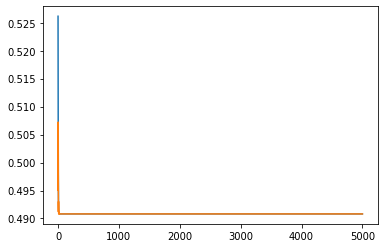

In [17]:
info.plot_resids()